# Business Case: Walmart - Confidence Interval and CLT

### Business Problem

#### DataLink: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

#### Walmart Dataset contains following aattribute:

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount

In [1]:
# loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data frame
walmart = pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [3]:
# checking the loaded dataframe with first few rows
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
#checking the loaded dataframe with last few rows
walmart.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [8]:
# checking the columns present in the dataframe
walmart.columns.to_list()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

In [9]:
# checking the shape of the dataframe 
walmart.shape

(550068, 10)

In [10]:
# total no. of volume(elements)
walmart.size 

5500680

In [11]:
#checking datatypes
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [12]:
#number of unique values in our data
walmart.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [13]:
#This method prints information about the DataFrame including the index dtype and columns, non-null values and memory usage
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [14]:
walmart.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### Analysing basic metrics

**Observation**
##### User_ID
- There is a number(numerical) given to particular user and there are total 5891 unique user_ids.
##### Product_ID
- There is alpha nummerical codes given to products and there are 3631 unique Product_IDs.
##### Gender
- There is two types of gender present in the dataset i.e Male(M) and Female(F). Most of them are Male.
##### Age
- There is 7 different range of age is given in the dataset. Most of the fall into 26-35.
##### Occupation
- There is a numerical code given to occupation. and there are 21 different types of occupation present in the data set.
##### City_Category
- There is three diffrent types of city is present(A, B, C). and most frequent is B.
##### Stay_In_Current_City_Years
- There is five different values are given here nd most frequent is 1.
##### Stay_In_Current_City_Years
- There is two types of maretial status present in the dataset. (0 - not married , 1- Married)
##### Product_Category 
- It is devided into 20 unique product category
##### Purchase
- There may be some outlier present in purchase.

### Missing value Detection 

In [15]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Observation**
- There is no missing values in the given Walmart dataset.

#### Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

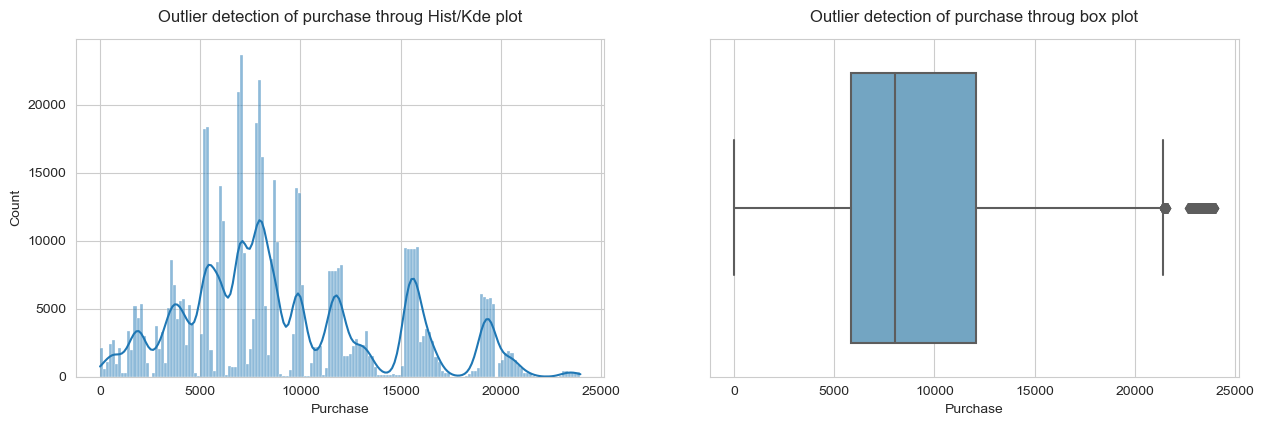

In [16]:
sns.set_style(style='whitegrid')
fig, axis = plt.subplots(1,2,figsize=(15, 2))
fig.subplots_adjust(top=1.8)
sns.histplot(data=walmart, x='Purchase',kde=True,ax=axis[0])
sns.boxplot(data=walmart, x='Purchase', palette='PuBuGn',ax=axis[1])
axis[0].set_title(f"Outlier detection of purchase throug Hist/Kde plot", pad=12, fontsize=12)
axis[1].set_title(f"Outlier detection of purchase throug box plot", pad=12, fontsize=12)
plt.show()

**Observation**
- There is some outlier present in  given purchase column.

### Non-Graphical Analysis: Value counts and unique 

In [17]:
# cheking for Gender
walmart['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
walmart['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

 **Observation**
- There are two distinct type of gender.
- 75.31% is male rest 24.69 % are female

In [19]:
# cheking for Age
walmart['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
walmart['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

 **Observation**
- There is 7 different type of age range has given in the dataset.
- minimum age cataegory is 0-17 and max 55+.
- most of the customer age range is 26-35(approx 39.91%) where as the least one is 0-17(approx 2.74%).

In [21]:
# cheking for Occupation
walmart['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [22]:
walmart['Occupation'].value_counts(normalize=True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

 **Observation**
- most of the customers are from occupation type 4 i.e 13.14% where as least is occupation 8 with0.28 %

In [23]:
# cheking for City_Category
walmart['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [24]:
walmart['City_Category'].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

 **Observation**
- There is three types of city category 'A','B' and 'C'.
- most of the customers are  from city catagory 'B' (approx 42.02%) where as the least one city category A(approx 26.85%).

In [25]:
# cheking for Stay_In_Current_City_Years
walmart['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
walmart['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

 **Observation**
- There is 5 types of category.
- most of the customers are stays in the current city  since 1 year (approx 35.23%) 
  where as the least is less than 1 year (approx 13.52%).

In [27]:
# cheking for Marital_Status
walmart['Marital_Status'].unique()

array([0, 1])

In [28]:
walmart['Marital_Status'].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

 **Observation**
- There is two types of category. Married and unmarried.
- most of the customers are single i.e 59.03 where as 40.96 are married

In [29]:
# cheking for Product_Category
walmart['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [30]:
walmart['Product_Category'].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

 **Observation**
- 20 types of product category is given in the datset.
- most of the customers purchase category 5 (approx 27.43%) where category 9 is the least with purchae of 0.07%

###  Data distribution categorical attributes(Univariant)

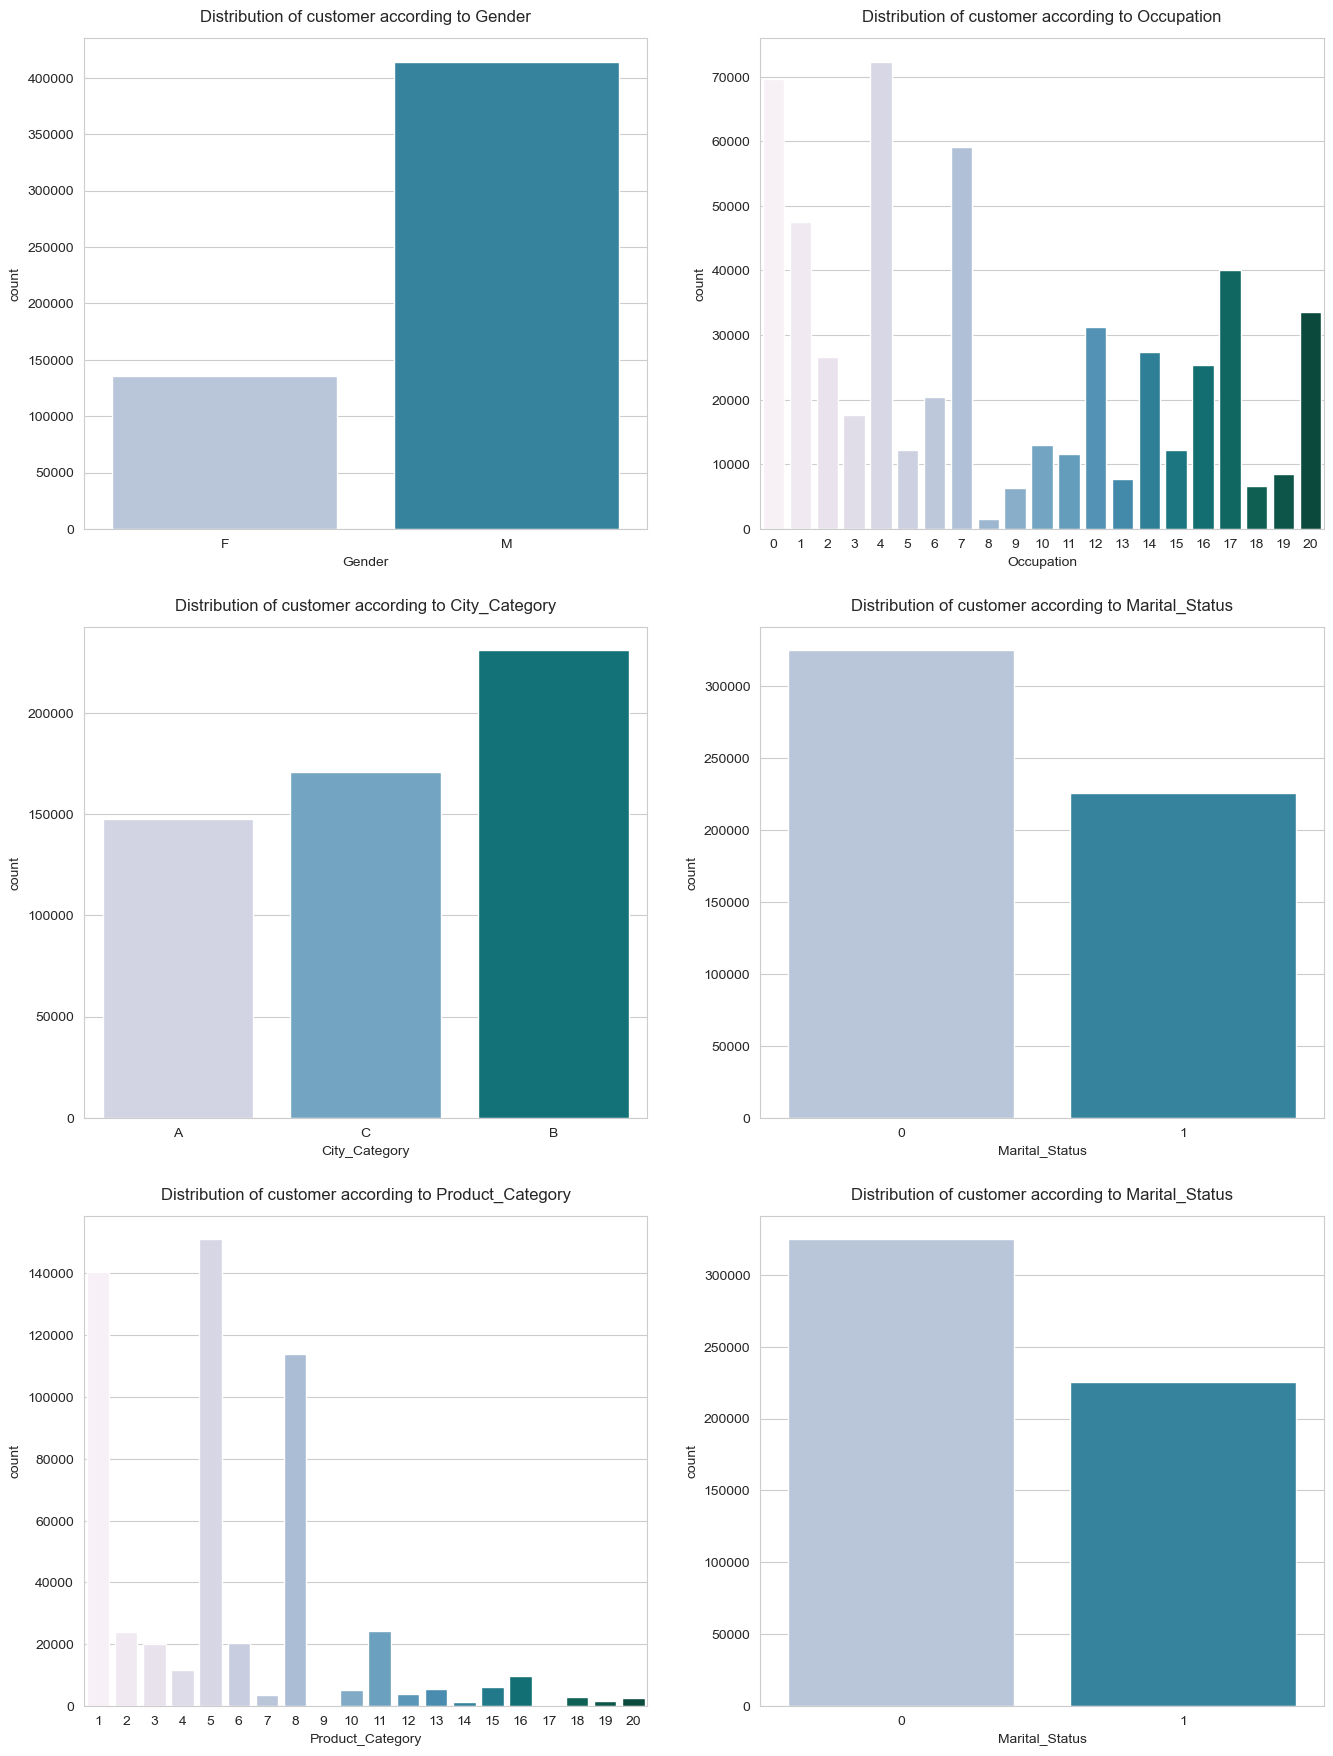

In [31]:
sns.set_style(style='whitegrid')
attributes = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category','Marital_Status']
fig, axis = plt.subplots(3,2,figsize=(16, 12))
fig.subplots_adjust(top=1.5)
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(data=walmart,x=attributes[count],ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Distribution of customer according to {attributes[count]}", pad=12, fontsize=12)
        count += 1
plt.show()

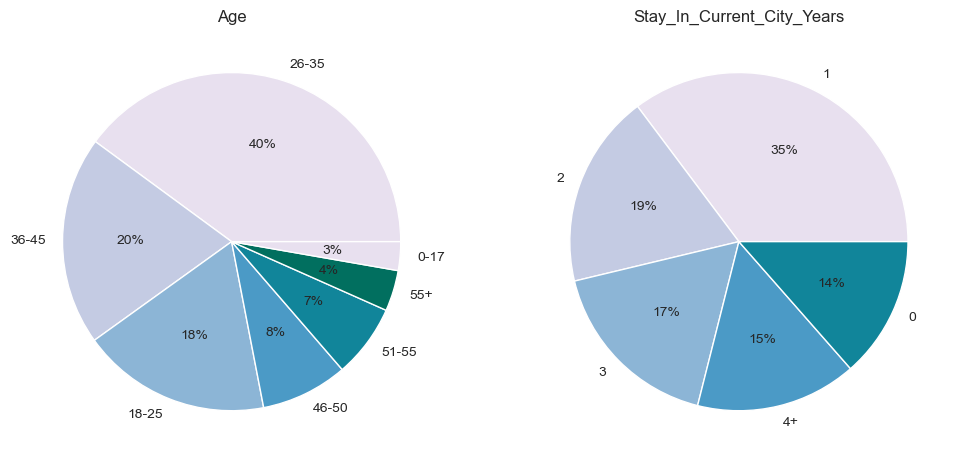

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = walmart['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = walmart['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

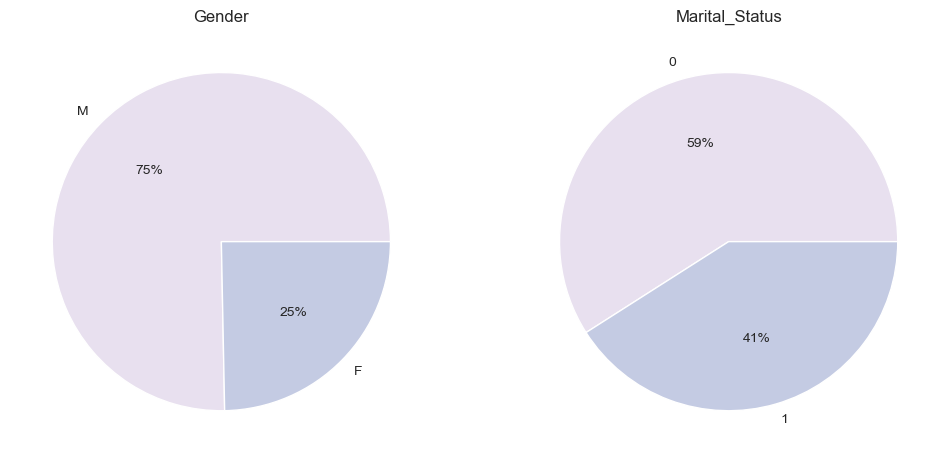

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = walmart['Gender'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Gender")

data = walmart['Marital_Status'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Marital_Status")
plt.show()

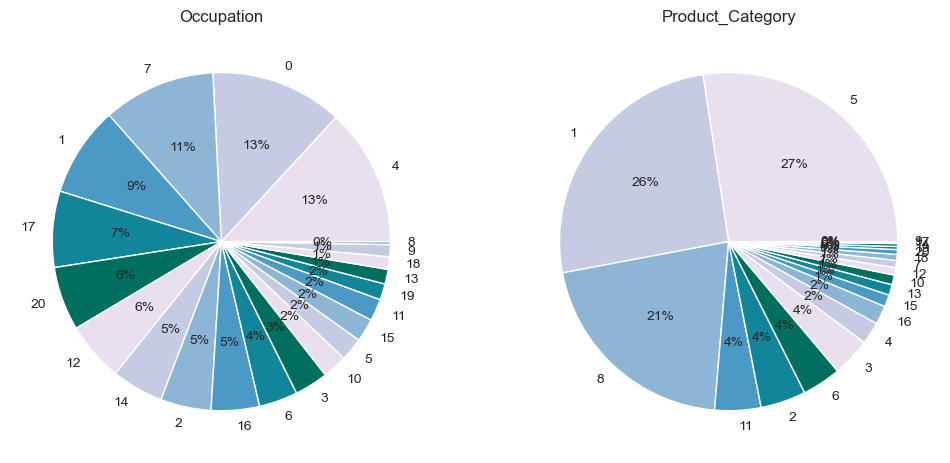

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = walmart['Occupation'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Occupation")

data = walmart['Product_Category'].value_counts(normalize=True)*100
palette_color = sns.color_palette('PuBuGn')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Product_Category")
plt.show()

**Observation**
- There are two distinct type of gender.
- 75.31% is male rest 24.69 % are female.
- minimum age cataegory is 0-17 and max 55+.
- most of the customer age range is 26-35(approx 39.91%) where as the least one is 0-17(approx 2.74%).
- most of the customers are from occupation type 4 i.e 13.14% where as least is occupation 8 with0.28 %
- most of the customers are  from city catagory 'B' (approx 42.02%) where as the least one city category A(approx 26.85%).
- most of the customers are stays in the current city  since 1 year (approx 35.23%) where as the least is less than 1 year (approx 13.52%).
- most of the customers are single i.e 59.03 where as 40.96 are married.
- most of the customers purchase category 5 (approx 27.43%) where category 9 is the least with purchae of 0.07%

### Bivarate Analysis

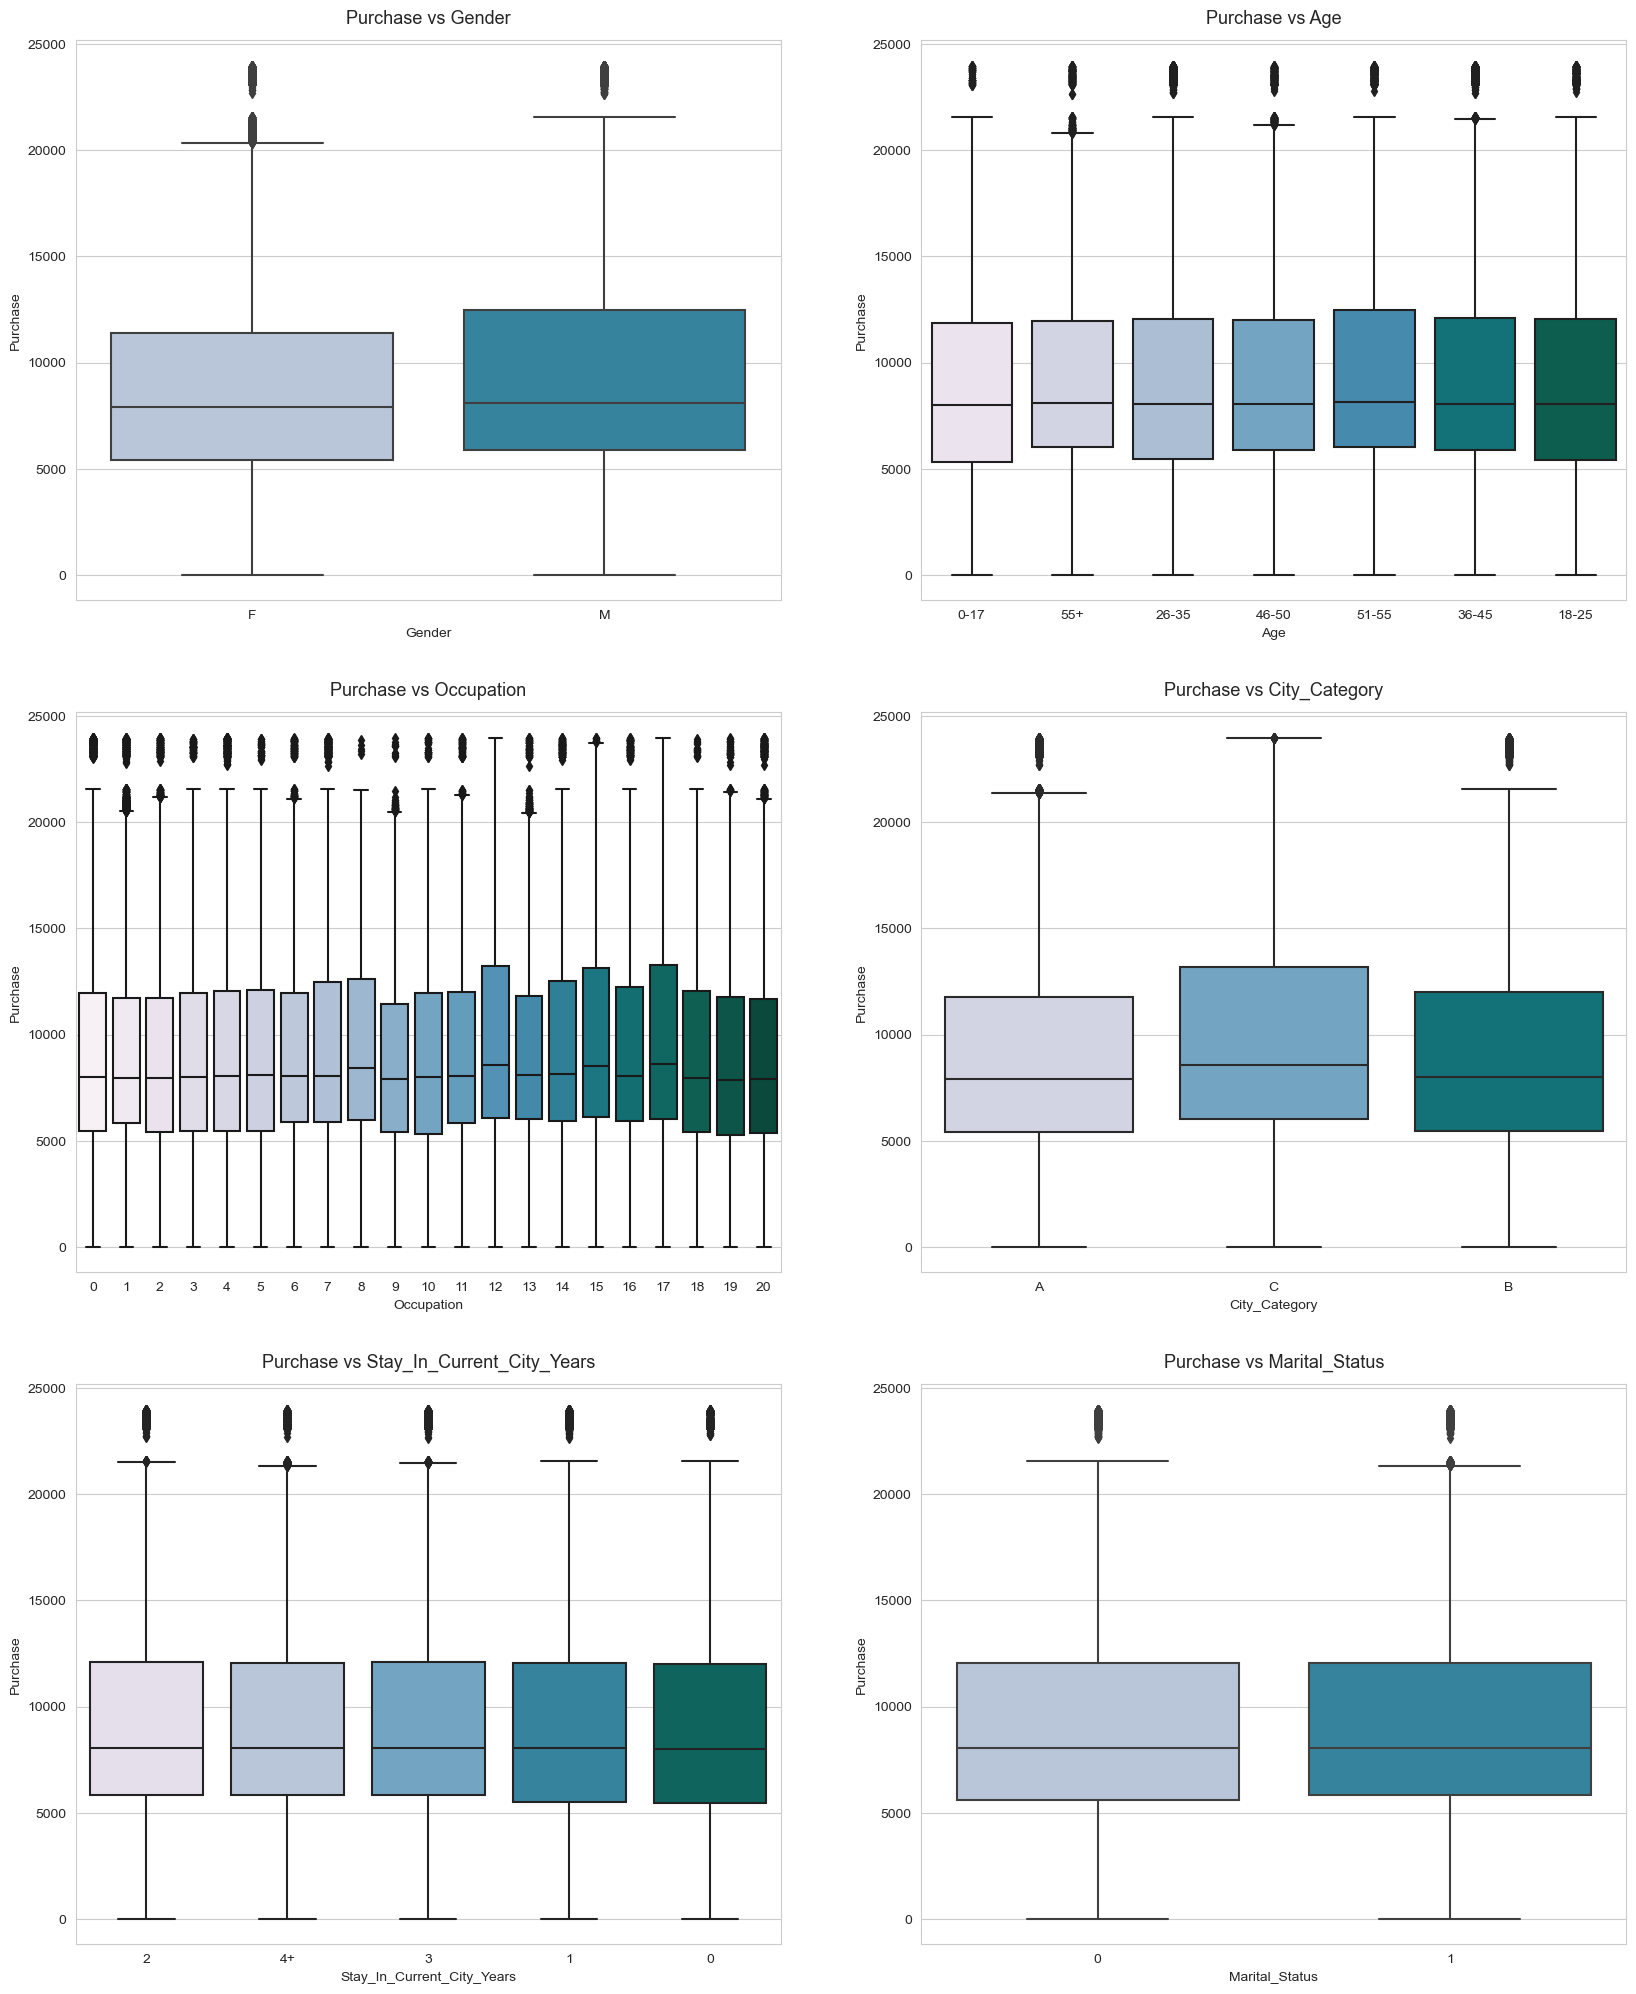

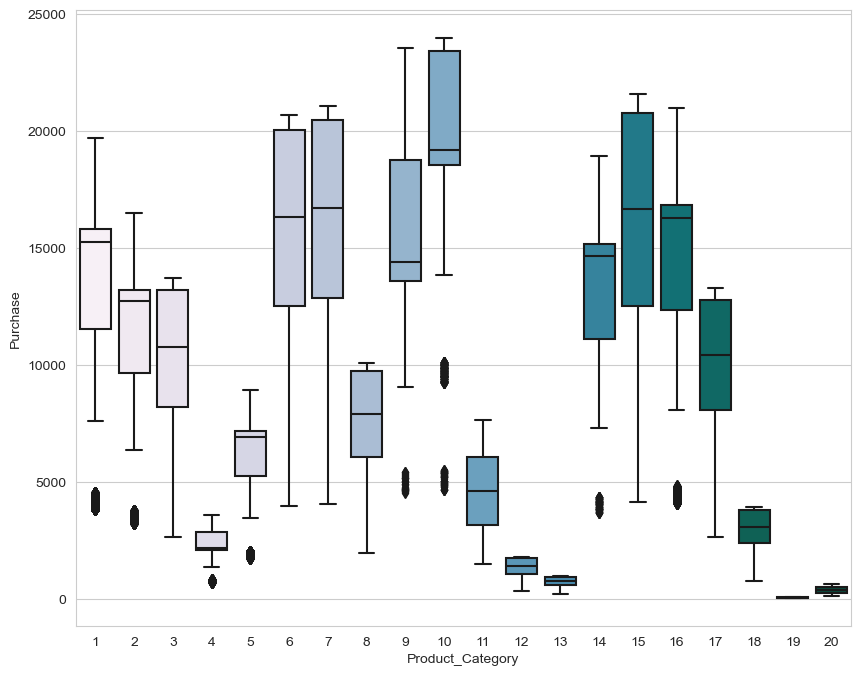

In [35]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=walmart, y='Purchase', x=attrs[count], ax=axs[row, col], palette='PuBuGn')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=walmart, y='Purchase', x=attrs[-1], palette='PuBuGn')
plt.show()

**Obsevation**
- Male customers have spent more than female on purchase
- Age range 18-45  has significant spent on purchase.
- Occupation type 4, 0 ,7,1 has the higher purchase and 13,18,9,8 have less purchase so walmart can focus on the   accusition of customer having occpation 4,0,7,1.
- People who live in category C has spent more on purhase than others.
- stay in the current city has no much difference on purchase
- unmarried has spent more than the married people on purchase
- Different product category has differeb=nt purchase.However 8,7, 15 are significant purchase

### Multivarate Analysis

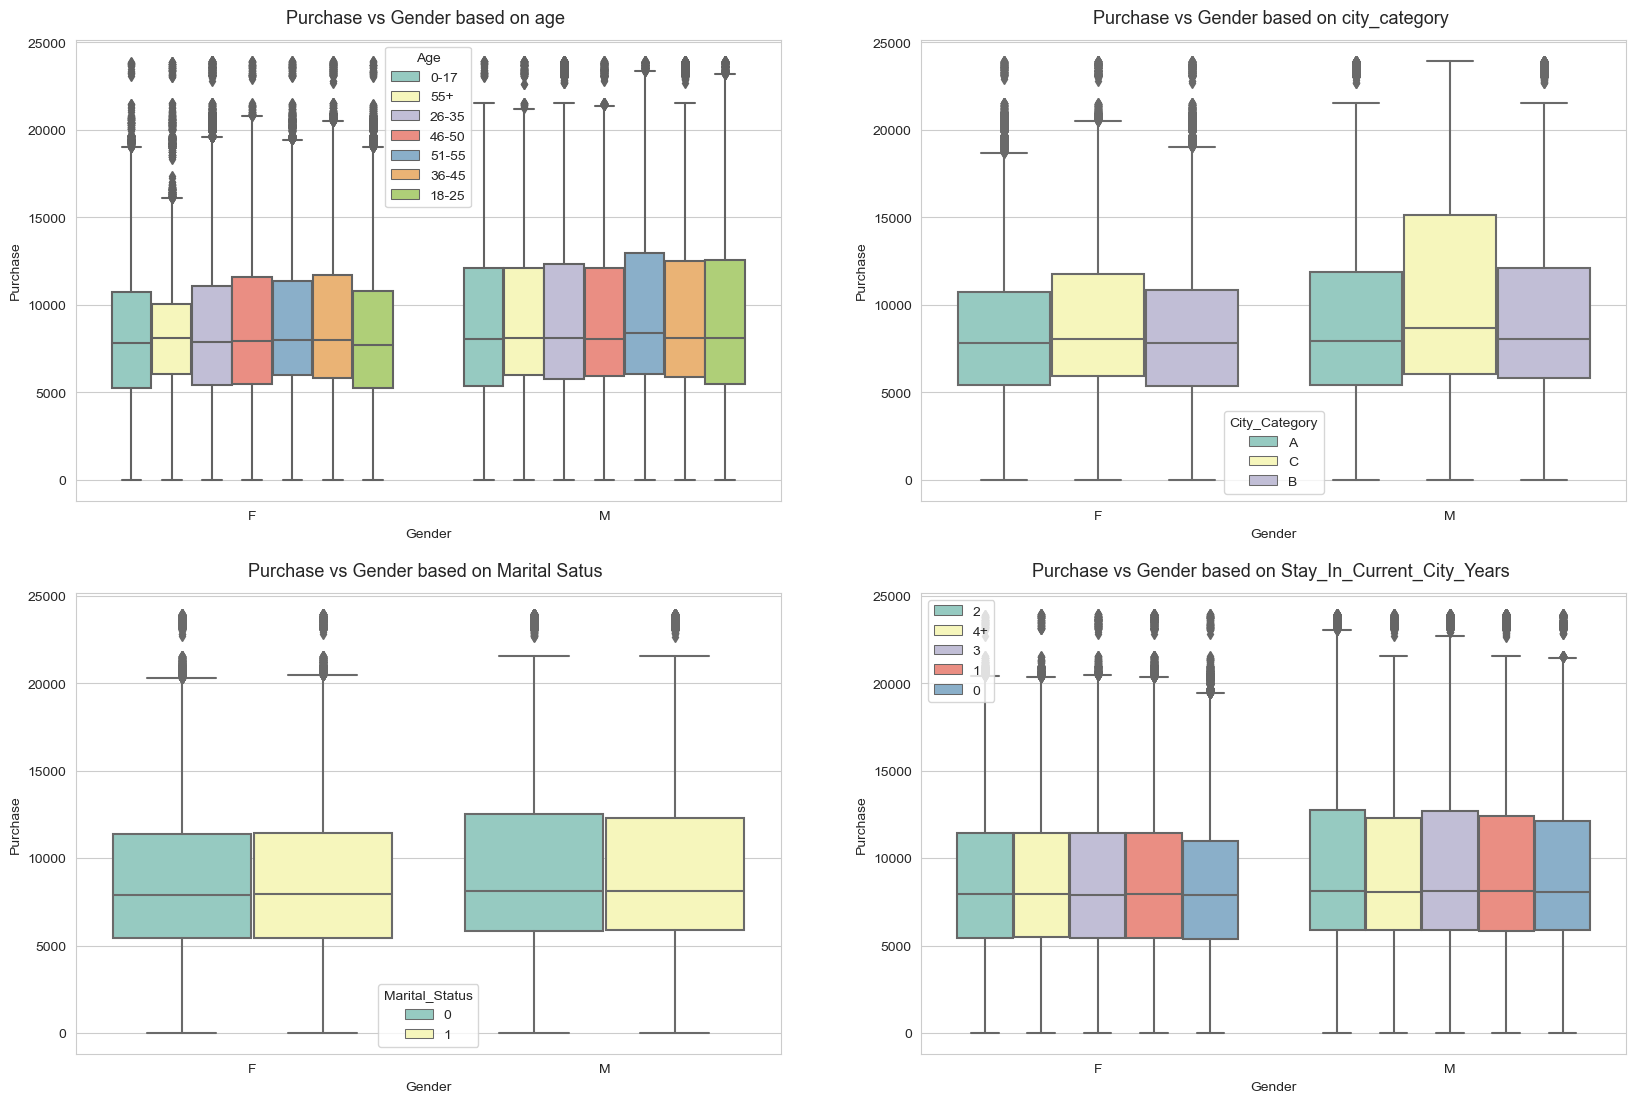

In [137]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.8)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
axs[0,0].set_title(f"Purchase vs Gender based on age ", pad=12, fontsize=13)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])
axs[0,1].set_title(f"Purchase vs Gender based on city_category ", pad=12, fontsize=13)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
axs[1,0].set_title(f"Purchase vs Gender based on Marital Satus ", pad=12, fontsize=13)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].set_title(f"Purchase vs Gender based on Stay_In_Current_City_Years ", pad=12, fontsize=13)
axs[1,1].legend(loc='upper left')

plt.show()

**Observation**
- We can see there is too many outliers incase of female based on different age range while male has less outliers 
- In both the cases age range between 18-45 has spent more on purchase.
- We can see there is too many outliers incase of female based on different age range while male has less outliers 
- In both the cases category C has spent more on purchase than A and B
- We can see there is too many outliers incase of female based on different Marital Status range while male has less outliers 
- overall unmarried has spent more than married on purchase.
- We can see there is too many outliers incase of female based on different Stay_In_Current_City_Years range while male has less outliers
- 0 type of stay in current city has spent less on the purchase.

#### Check correlation among different factors using heat maps and pair plots.

In [37]:
walmart.corr()

/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_4170/2701880582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_4170/1135648556.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(walmart.corr(),annot=True)


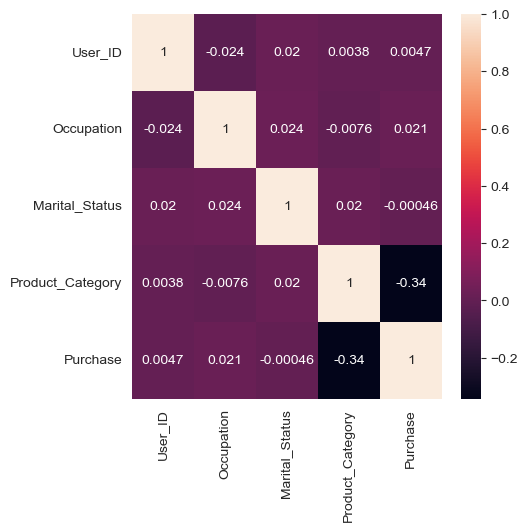

In [139]:
plt.subplots(figsize=(5,5)) 
sns.heatmap(walmart.corr(),annot=True) 
plt.show()

**Observation**
- This provides the relationship between differen categorical attributes with each other.

### Answering questions 
###### Are women spending more money per transaction than men? Why or Why not? 

In [54]:
amt_df = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [55]:
amt_df['Gender'].value_counts(normalize=True)*100

M    71.719572
F    28.280428
Name: Gender, dtype: float64

In [53]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))


Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [62]:
male_sum = amt_df[amt_df['Gender']=='M']['Purchase'].sum()
female_sum = amt_df[amt_df['Gender']=='F']['Purchase'].sum()

print("Total amount spend by Male customers: {:.2f}".format(male_sum))
print("Total amount spend by Female customers: {:.2f}".format(female_sum))

Total amount spend by Male customers: 3909580100.00
Total amount spend by Female customers: 1186232642.00


Text(0.5, 1.0, 'Distribution of Purchase based on Gender')

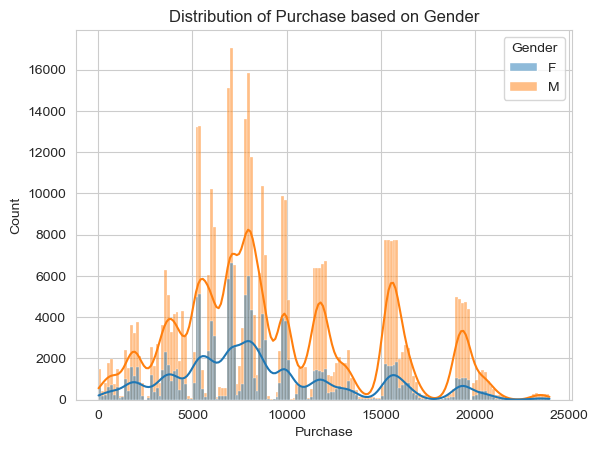

In [145]:
sns.histplot(data=walmart, x='Purchase',hue='Gender',kde=True).set_title("Distribution of Purchase based on Gender")

**Observation**
* It is clearly visible that male customers are spending more than the female customers.
* Average amount spend by Male customers: 925344.40
* Average amount spend by Female customers: 712024.39
* In the given dataset of walmart customers 72% approx are male and 28% are female . so the number of male customer is very high than the female customers. This might be the reason why male customers are spending more than the female customers.
* Secondly, There is a chance that women are less aware than the male about walmart
 

###### Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [92]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [93]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []
for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)

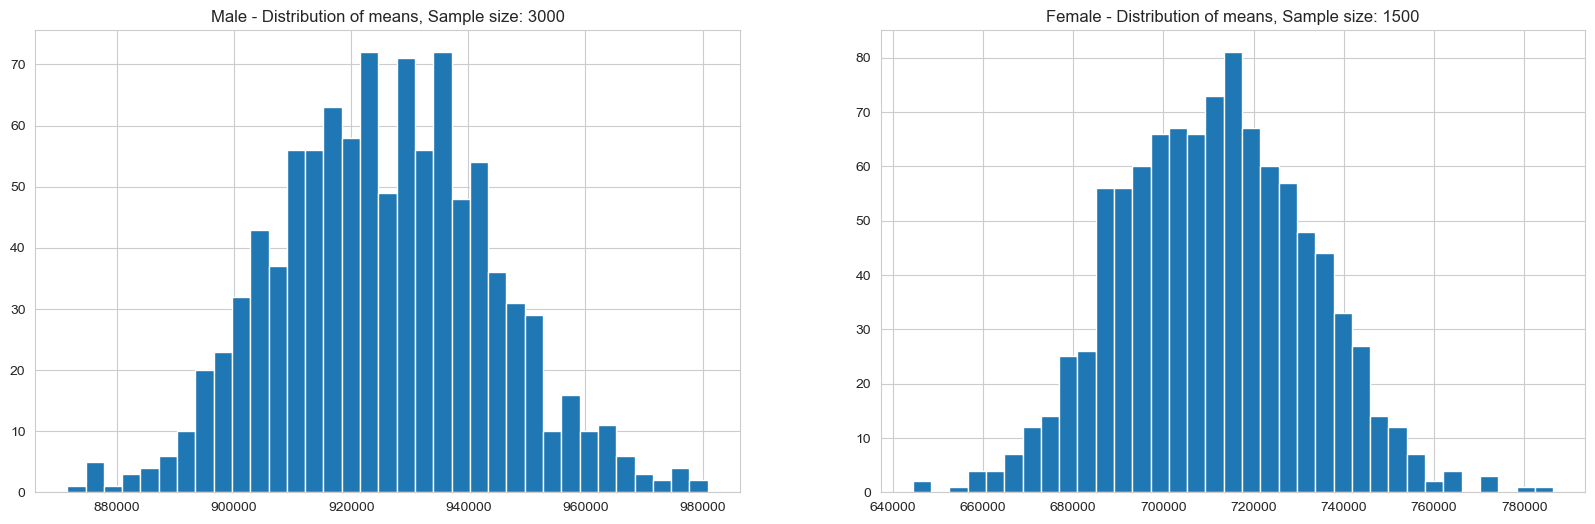

In [94]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [97]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925588.47
Population mean - Mean of sample means of amount spend for Female: 711170.12

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation**
###### Now using the Central Limit Theorem for the population we can say that:
- Average amount spend by male customers is 9,25,588.47
- Average amount spend by female customers is 7,11,170.12 

###### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

In [99]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Observation**
###### Now we can infer about the population that, 95% of the times:
- Average amount spend by male customer will lie in between: (895617.83, 955070.97)
- Average amount spend by female customer will lie in between: (673254.77, 750794.02) 
- Both the sample's confidence intrval are not overlapping
- So walmart can conclude the both male and female groups differebce is statistically significant
- walmart can focous on the female cutomer's awarness about the products. So that going forward female cusomer will increase

##### Results when the same activity is performed for Married vs Unmarried 

In [101]:
amt_df = walmart.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [102]:
amt_df['Marital_Status'].value_counts(normalize=True)*100

0    58.003735
1    41.996265
Name: Marital_Status, dtype: float64

In [106]:
male_avg = amt_df[amt_df['Marital_Status']==1]['Purchase'].mean()
female_avg = amt_df[amt_df['Marital_Status']==0]['Purchase'].mean()

print("Average amount spend by Married customers: {:.2f}".format(male_avg))
print("Average amount spend by Single customers: {:.2f}".format(female_avg))

Average amount spend by Married customers: 843526.80
Average amount spend by Single customers: 880575.78


In [108]:
male_sum = amt_df[amt_df['Marital_Status']==1]['Purchase'].sum()
female_sum = amt_df[amt_df['Marital_Status']==0]['Purchase'].sum()

print("Total amount spend by Married customers: {:.2f}".format(male_sum))
print("Total amount spend by Single customers: {:.2f}".format(female_sum))

Total amount spend by Married customers: 2086885295.00
Total amount spend by Single customers: 3008927447.00


Text(0.5, 1.0, 'Distribution of purchase based on Marital Status')

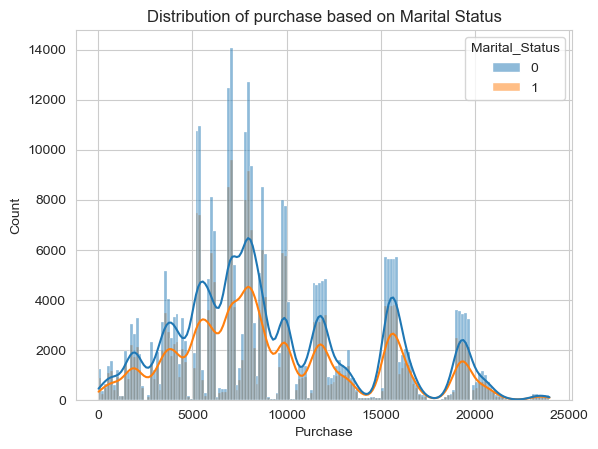

In [144]:
sns.histplot(data=walmart, x='Purchase',hue='Marital_Status',kde=True).set_title("Distribution of purchase based on Marital Status")

**Observation**
* It is clearly visible that unmarried customers are spending more than the married customers.
* Average amount spend by unmarried customers: 880575.78
* Average amount spend by married customers: 843526.80
* In the given dataset of walmart customers 59% approx are unmarried and 41% are married .
* so the number of unmarried customer is very high than the married customers. This might be the reason why unmarried
  customers are spending more than the married customers.
* May be walmart can introduce some copule discount to attract more married customers

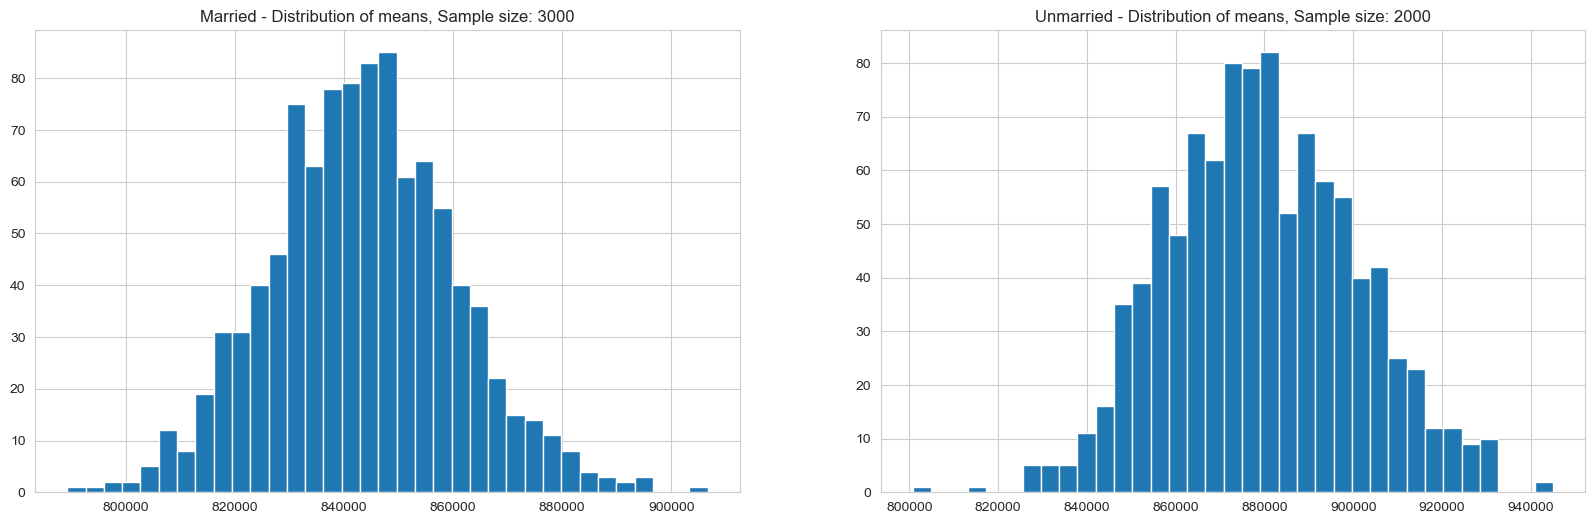

Population mean - Mean of sample means of amount spend for Married: 843397.11
Population mean - Mean of sample means of amount spend for Unmarried: 879415.58

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [104]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [111]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


In [113]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.03*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (824157.56, 862896.03)
Unmarried confidence interval of means: (863846.38, 897305.19)


**Observation**
###### Now we can infer about the population that, 70% of the times as it is overlapping at higher confidence intevala range:
- Average amount spend by married customer will lie in between: (824157.56, 862896.03)
- Average amount spend by unmarried customer will lie in between: (863846.38, 897305.19)
- Both the sample's confidence intrval are not overlapping
- So walmart can conclude the both married and unmarried groups differebce is statistically significant
- walmart can focous on the married cutomer's by introducing some product discount or gifts on anniversary

##### Results when the same activity is performed for Age 

In [115]:
amt_df = walmart.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [116]:
amt_df['Age'].value_counts(normalize=True)*100

26-35    34.849771
36-45    19.809879
18-25    18.146325
46-50     9.013750
51-55     8.164997
55+       6.314717
0-17      3.700560
Name: Age, dtype: float64

In [120]:
avg_1 = amt_df[amt_df['Age']=='26-35']['Purchase'].mean()
avg_2 = amt_df[amt_df['Age']=='36-45']['Purchase'].mean()
avg_3 = amt_df[amt_df['Age']=='18-25']['Purchase'].mean()
avg_4 = amt_df[amt_df['Age']=='46-50']['Purchase'].mean()
avg_5 = amt_df[amt_df['Age']=='51-55']['Purchase'].mean()
avg_6 = amt_df[amt_df['Age']=='55+']['Purchase'].mean()
avg_7 = amt_df[amt_df['Age']=='0-17']['Purchase'].mean()

print("Average amount spend by 26-35 customers: {:.2f}".format(avg_1))
print("Average amount spend by 36-45 customers: {:.2f}".format(avg_2))
print("Average amount spend by 18-25 customers: {:.2f}".format(avg_3))
print("Average amount spend by 46-50 customers: {:.2f}".format(avg_4))
print("Average amount spend by 51-55 customers: {:.2f}".format(avg_5))
print("Average amount spend by 55+ customers: {:.2f}".format(avg_6))
print("Average amount spend by 0-17 customers: {:.2f}".format(avg_7))

Average amount spend by 26-35 customers: 989659.32
Average amount spend by 36-45 customers: 879665.71
Average amount spend by 18-25 customers: 854863.12
Average amount spend by 46-50 customers: 792548.78
Average amount spend by 51-55 customers: 763200.92
Average amount spend by 55+ customers: 539697.24
Average amount spend by 0-17 customers: 618867.81


In [121]:
sum_1 = amt_df[amt_df['Age']=='26-35']['Purchase'].sum()
sum_2 = amt_df[amt_df['Age']=='36-45']['Purchase'].sum()
sum_3 = amt_df[amt_df['Age']=='18-25']['Purchase'].sum()
sum_4 = amt_df[amt_df['Age']=='46-50']['Purchase'].sum()
sum_5 = amt_df[amt_df['Age']=='51-55']['Purchase'].sum()
sum_6 = amt_df[amt_df['Age']=='55+']['Purchase'].sum()
sum_7 = amt_df[amt_df['Age']=='0-17']['Purchase'].sum()

print("Total amount spend by 26-35 customers: {:.2f}".format(sum_1))
print("Total amount spend by 36-45 customers: {:.2f}".format(sum_2))
print("Total amount spend by 18-25 customers: {:.2f}".format(sum_3))
print("Total amount spend by 46-50 customers: {:.2f}".format(sum_4))
print("Total amount spend by 51-55 customers: {:.2f}".format(sum_5))
print("Total amount spend by 55+ customers: {:.2f}".format(sum_6))
print("Total amount spend by 0-17 customers: {:.2f}".format(sum_7))

Total amount spend by 26-35 customers: 2031770578.00
Total amount spend by 36-45 customers: 1026569884.00
Total amount spend by 18-25 customers: 913848675.00
Total amount spend by 46-50 customers: 420843403.00
Total amount spend by 51-55 customers: 367099644.00
Total amount spend by 55+ customers: 200767375.00
Total amount spend by 0-17 customers: 134913183.00


Text(0.5, 1.0, 'Distribution of purchase based on Age')

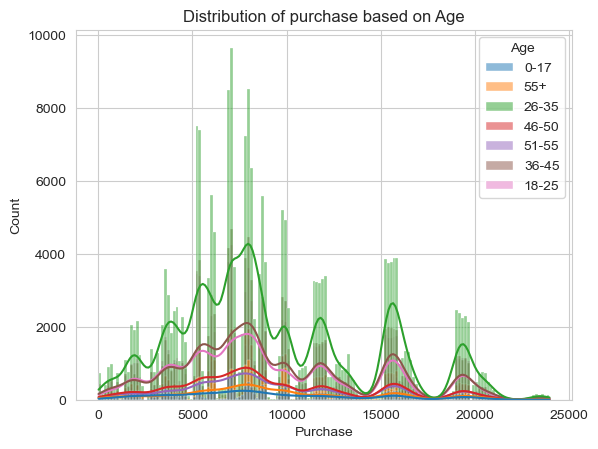

In [146]:
sns.histplot(data=walmart, x='Purchase',hue='Age',kde=True).set_title("Distribution of purchase based on Age")

**Observation**
- Maximum amount has spent by age rane 26-35 customer as they are maximum in number in the dataset
- Least amount has spent by age 0-17 as they are minimum in the number in the dataset

In [118]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [119]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


In [126]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 0.841*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (970511.59, 1008807.04)
For age 36-45 --> confidence interval of means: (855500.73, 903830.69)
For age 18-25 --> confidence interval of means: (832022.96, 877703.28)
For age 46-50 --> confidence interval of means: (758632.82, 826464.74)
For age 51-55 --> confidence interval of means: (732818.30, 793583.55)
For age 55+ --> confidence interval of means: (512772.81, 566621.68)
For age 0-17 --> confidence interval of means: (579733.27, 658002.35)


**Observation**
###### Now we can infer about the population that, 60% of the times as it is overlapping at higher confidence intevala range:

- For age 26-35 --> confidence interval of means: (970511.59, 1008807.04)
- For age 36-45 --> confidence interval of means: (855500.73, 903830.69)
- For age 18-25 --> confidence interval of means: (832022.96, 877703.28)
- For age 46-50 --> confidence interval of means: (758632.82, 826464.74)
- For age 51-55 --> confidence interval of means: (732818.30, 793583.55)
- For age 55+ --> confidence interval of means: (512772.81, 566621.68)
- For age 0-17 --> confidence interval of means: (579733.27, 658002.35)
- walmart can focous on the different need of the different range age group of customers.

# Bussiness Insights

~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are Male and 25% are Female
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city
-Most of the users are Male
-There are 20 different types of Occupation and Product_Category-More users belong to B City_Category
-More users are Single as compare to Married
-Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.
-Average amount spend by Male customers: 925344.40
-Average amount spend by Female customers: 712024.39
##### Confidence Interval by Gender
- Now using the Central Limit Theorem for the population:

- Average amount spend by male customers is 9,25,588.47
- Average amount spend by female customers is 7,11,170.12
- Now we can infer about the population that, 95% of the times:¶
- Average amount spend by male customer will lie in between: (895617.83, 955070.97)
- Average amount spend by female customer will lie in between: (673254.77, 750794.02)
##### Confidence Interval by Marital Status
- Now we can infer about the population that, 70% of the times as it is overlapping at higher confidence intevala range:¶
- Average amount spend by married customer will lie in between: (824157.56, 862896.03)
- Average amount spend by unmarried customer will lie in between: (863846.38, 897305.19)
##### Confidence Interval by Age
- Now we can infer about the population that, 60% of the times as it is overlapping at higher confidence intevala range:
- For age 26-35 --> confidence interval of means: (970511.59, 1008807.04)
- For age 36-45 --> confidence interval of means: (855500.73, 903830.69)
- For age 18-25 --> confidence interval of means: (832022.96, 877703.28)
- For age 46-50 --> confidence interval of means: (758632.82, 826464.74)
- For age 51-55 --> confidence interval of means: (732818.30, 793583.55)
- For age 55+ --> confidence interval of means: (512772.81, 566621.68)
- For age 0-17 --> confidence interval of means: (579733.27, 658002.35)

# Recomendation 

- Men spent more money than women, So company should focus on retaining the male customers and getting more female customers by increasing the awareness of the product or by specific packaging for women to attract female cusomets.
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less. company should collect the feedback from users so thet they can improve their product
- Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.Company can introdi=uce some couple discount or bonous point to attract married customers. 
- Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
- Male customers living in City_Category C spend more money than other male customers living in B or A, Selling more products in the City_Category C will help the company increase the revenue. However City_category A and B has significant purchases so walmart can conduct some product awareness program in these cities.
- Occupation type 4, 0 ,7,1 has the higher purchase and 13,18,9,8 have less purchase so walmart can focus on the accusition of customer having occpation 4,0,7,1.
- cusomers who have approx 1 and 2 yearin the current city has more purchased walmart products. 
  So walmart should focus on these customer accusition and focus on the awareness of other customers.
  
  
  
  
  